<a href="https://colab.research.google.com/github/nidhaloff/keras_mnist/blob/master/keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import Libraries
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [12]:
# load data
dataset = keras.datasets.mnist
train_data, test_data = dataset.load_data()
X_train, y_train = train_data
X_test, y_test = test_data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print("random image: ", X_train[0])

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
random image:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]

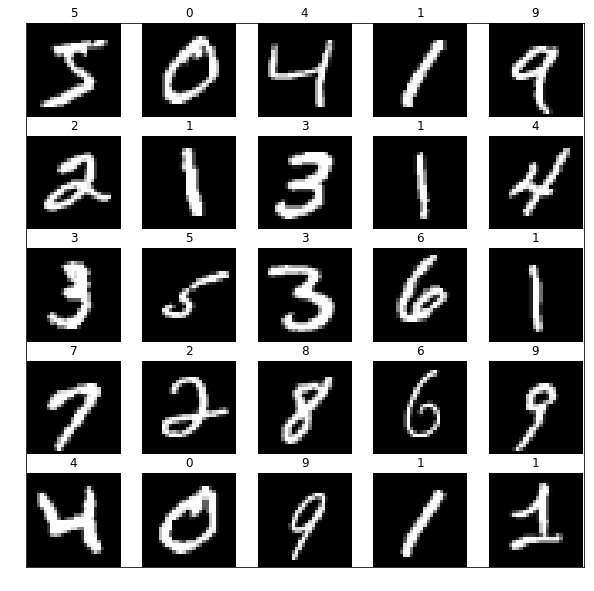

In [13]:
# visualization
def plot_image(dataset, index, color='gray'):
    plt.imshow(dataset[index], cmap=color)
    plt.show()

def plot_figures(dataset, labels, color="gray"):
    fig = plt.figure(figsize=(10, 10))
    plt.xticks([])
    plt.yticks([])
    rows = 5
    cols = 5
    for i in range(rows*cols):
        fig.add_subplot(5, 5, i+1)
        plt.axis('off')
        plt.title(labels[i])
        plt.imshow(dataset[i], cmap=color)
    plt.show()


plot_figures(dataset=X_train, labels=y_train)
# plot_image(dataset=X_train, index=0)



random image after nomrlaization:  [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       

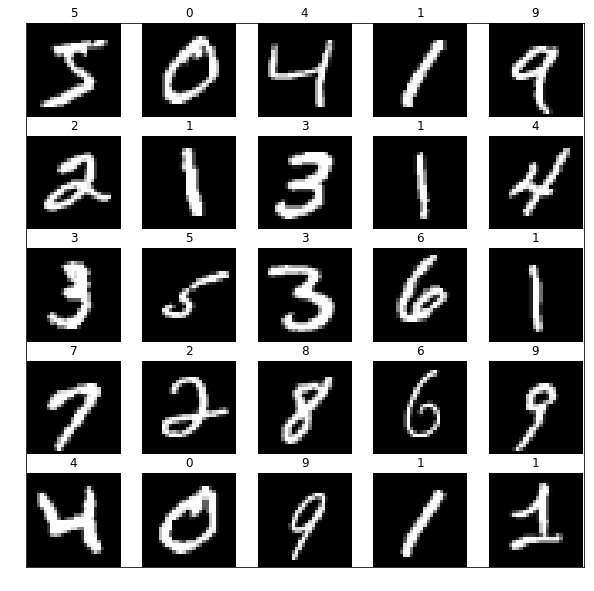

In [14]:
# normalize data
X_train, X_test = X_train/255, X_test/255
print("random image after nomrlaization: ", X_train[0])
plot_figures(X_train, y_train)

In [0]:
# create the neural network
nn = keras.Sequential([
                       keras.layers.Flatten(input_shape=(28, 28)),
                       keras.layers.Dense(64, activation=keras.activations.relu),
                       keras.layers.Dense(10, activation=keras.activations.softmax)
])

In [0]:
# compile the network:
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# train the network
nn.fit(X_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.2998 - acc: 0.9148
Epoch 2/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.1438 - acc: 0.9581
Epoch 3/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.1049 - acc: 0.9690
Epoch 4/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.0817 - acc: 0.9757
Epoch 5/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.0669 - acc: 0.9794


In [18]:
nn.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 64us/step


[0.08921255442881956, 0.9725]

In [19]:
loss, accuracy = nn.evaluate(X_test, y_test)
print(f"loss = {loss} and accuracy of the network= {accuracy* 100}%")

10000/10000 [==============================] - 1s 61us/step
loss = 0.08921255442881956 and accuracy of the network= 97.25%


(10000, 10)
[7, 2, 1, 0, 4, 1, 4, 9, 6, 9] [7 2 1 0 4 1 4 9 5 9]
correct prediction = 9725 and false predictions= 275


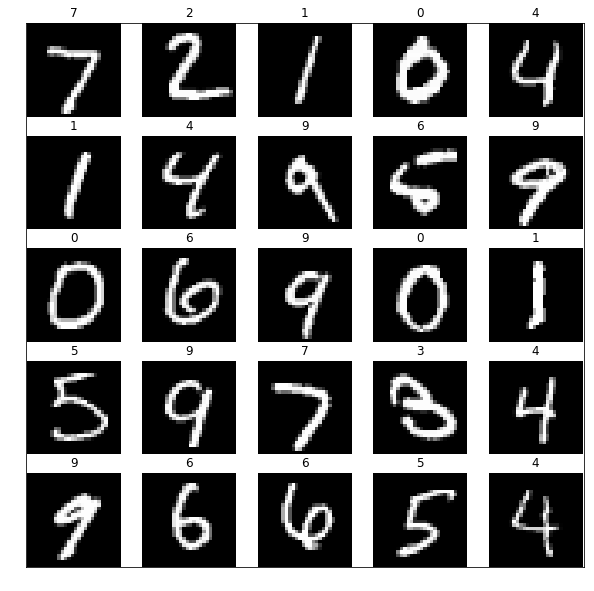

In [39]:
y_pred = nn.predict(X_test)
print(y_pred.shape)
predictions = [np.argmax(y_pred[i]) for i in range(len(y_pred))]

print(predictions[:10], y_test[:10])
correct_preds = (predictions == y_test)
correct_preds = [1  if x == True else 0 for x in correct_preds]

correct = correct_preds.count(1)
false = correct_preds.count(0)
print(f"correct prediction = {correct} and false predictions= {false}")

plot_figures(dataset=X_test, labels=predictions)